<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center"></a>

<h1 align=center><font size = 5>PROJECT DEEP LEARNING</font></h1>
<h1 align=center><font size = 3>oleh : Andi Muhammad Dirham D. || Annisa Sugesti || Atika Agustina

#Pendahuluan
Pada project  Deep Learning ini akan dilakukan proses klasifikasi menggunakan metode Convolutional Neural Network (CNN) pada dataset Fashion MNIST. Dataset ini dikembangkan oleh peneliti dari Zalando, berisi gambar baju dan aksesoris, seperti: kemeja, tas, sepatu, dan barang mode lainnya.

Fashion MNIST berisi 55,000 training set, dan 10,000 test set, serta 5000 validation set. Serupa dengan MNIST, setiap
data Fashion MNIST merupakan sebuah gambar skala abu (grayscale) berukuran 28x28
pixel. Masing-masing data memiliki label asosiasinya yang terdiri dari 10 kelas. 
Berikut nama kelas pada dataset Fashion MNIST : 


*  Label 0 : T_shirt/top
*  Label 1 : Trouser
*  Label 2 : Pullover
*  Label 3 : Dress
*  Label 4 : Coat
*  Label 5 : Sandal
*  Label 6 : Shirt
*  Label 7 : Sneaker
*  Label 8 : Bag
*  Label 9 : Ankle Boot

Langkah pertama yang perlu dilakukan adalah mengimport library 

In [0]:
import cv2 # library untuk mengolah citra dinamis secara real time
import numpy as np  
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers.advanced_activations import LeakyReLU
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


Using TensorFlow backend.


#Pre_processing

## Download Dataset

Dataset tersebut juga tersedia dalam library tensorflow dan dapat di import dengan langkah sebagai berikut ini.

In [0]:
# Download datasets
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: No such file or directory
data/fashion/train-images-idx3-ubyte.gz: No such file or directory
data/fashion/train-labels-idx1-ubyte.gz: No such file or directory
data/fashion/t10k-images-idx3-ubyte.gz: No such file or directory
data/fashion/t10k-labels-idx1-ubyte.gz: No such file or directory


## Import Dataset

Berikut adalah langkah untuk import dataset menggunakan library tensorflow

In [0]:
# Import libraries
from tensorflow.examples.tutorials.mnist import input_data
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

W0818 16:57:35.141989 140528583362432 deprecation.py:323] From <ipython-input-3-e5ef942bf49f>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0818 16:57:35.143946 140528583362432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0818 16:57:35.145558 140528583362432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz


W0818 16:57:35.914051 140528583362432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz


W0818 16:57:36.188621 140528583362432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


##Pengelompokan data Train, data Validasi, dan data Test

Pada bagian ini kita akan mendefinisikan 3 jenis dataset yang akan digunakan, yaitu data training, data validasi, dan data testing. Data training merupakan data yang digunakan untuk melatih model untuk mencari pola masing-masing data berdasarkan class-nya. Data testing merupakan data yang digunakan untuk mengevaluasi performa dan akurasi dari model, mencerminkan situasi nyata. Sedangkan data validasi merupakan data yang digunakan untuk melakukan evaluasi sistem Deep Learning, ketika sistemnya masih belajar. Semacam, evaluasi on the go. Umumnya digunakan untuk mencegah model menjadi overfitting, opsional untuk dipakai.

Pada project ini akan digunakan formasi data "55000-5000-10000", yaitu 55000 untuk data training, 5000 untuk data validasi, dan 10000 untuk data testing. 

In [0]:
# mendefinisikan data training
x_train = fashion_mnist.train.images
y_train = fashion_mnist.train.labels

# mendefinisikan data testing
x_test = fashion_mnist.test.images
y_test = fashion_mnist.test.labels

# mendefinisikan data validation
x_val = fashion_mnist.validation.images
y_val = fashion_mnist.validation.labels

## Bentuk Dataset

In [0]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

# Shapes of validation set
print("Validation set (images) shape: {shape}".format(shape=x_val.shape))
print("Validation set (labels) shape: {shape}".format(shape=y_val.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)
Validation set (images) shape: (5000, 784)
Validation set (labels) shape: (5000,)


Output diatas menunjukkan ukuran dari data train, data test, dan data validasi.
Dapat diketahui bahwa data train terdiri dari 55000 data gambar. Data test terdiri dari 10000 data gambar. Data validasi terdiri dari 5000 data gambar. Setiap data gambar pada datasets tersebut terdiri dari 784 (28 x 28) pixel.

###Akses data training

In [0]:
# Mengakses data value
df_train_images = pd.DataFrame(x_train)
df_train_images.head(5)

# ket : jumlah kolom menunjukkan ukuran data, jumlah baris menunjukkan banyaknya data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.172549,...,0.650980,0.698039,0.635294,0.611765,0.384314,0.000000,0.941177,0.882353,0.823529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168627,0.643137,0.807843,0.552941,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.498039,0.490196,0.298039,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172549,0.215686,0.376471,0.788235,0.137255,0.0,0.0,0.0,0.0,0.0,0.235294,0.721569,0.207843,0.196078,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356863,0.407843,0.32549,0.172549,0.701961,0.952941,...,0.396078,0.454902,0.454902,0.529412,0.454902,0.337255,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.137255,0.235294,0.305882,0.345098,0.384314,0.396078,0.407843,0.317647,0.254902,0.215686,0.137255,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [0]:
df_train_labels = pd.DataFrame(y_train)
df_train_labels.head(5)

,0
0,4
1,0
2,7
3,9
4,9


8 data train pertama


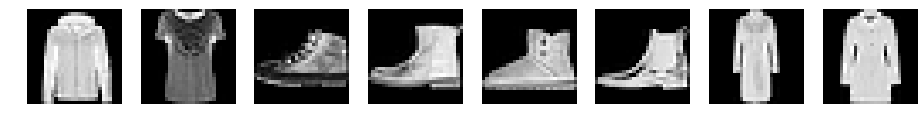

In [0]:
# Mengakses data gambar
plt.figure(figsize=(18, 8))

print('8 data train pertama')
for i in range(8):
    plt.subplot(1, 9, i+1)
    img = x_train[i]
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    #plt.title("Class " + str(i))
    plt.axis('off')

plt.show()

###Akses data test

In [0]:
# Mengakses data value
df_test_images = pd.DataFrame(x_test)
df_test_images.head(5)

# ket : jumlah kolom menunjukkan ukuran data, jumlah baris menunjukkan banyaknya data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.050980,0.262745,0.000000,0.000000,0.000000,0.000000,0.196078,0.149020,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031373,0.470588,0.819608,0.886275,0.968628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.152941,0.976471,1.0,0.482353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192157,0.803922,0.772549,0.043137,0.0,0.015686,0.003922,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.262745,0.694118,0.505882,0.600000,0.458824,0.505882,0.572549,0.552941,0.686275,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,0.768628,1.000000,...,0.631373,1.000000,0.988235,0.466667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.384314,0.623529,0.278431,0.000000,0.000000,0.266667,0.690196,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,0.482353,0.423529,0.388235,0.388235,0.329412,0.325490,0.337255,0.360784,0.274510,0.023529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.415686,0.972549,0.901961,...,0.878431,0.972549,0.180392,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078431,0.682353,0.396078,0.000000,0.000000,0.000000,0.572549,0.572549,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,0.000000,0.223529,0.262745,0.286275,0.298039,0.298039,0.325490,0.243137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.003922,0.003922,0.0,0.000000,0.050980,0.309804,0.501961,0.788235,...,0.611765,0.682353,0.772549,0.713726,0.635294,0.239216,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.117647,0.282353,0.372549,0.427451,0.435294,0.435294,0.415686,0.396078,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [0]:
df_test_labels = pd.DataFrame(y_test)
df_test_labels.head(5)

,0
0,9
1,2
2,1
3,1
4,6


8 data test pertama


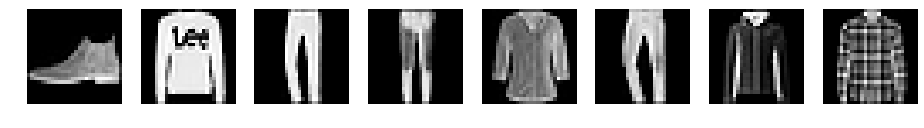

In [0]:
# Mengakses data gambar
plt.figure(figsize=(18, 8))

print('8 data test pertama')
for i in range(8):
    plt.subplot(1, 9, i+1)
    img = x_test[i]
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    #plt.title("Class " + str(i))
    plt.axis('off')
    
plt.show()

###Akses data validasi

In [0]:
# Mengakses data value
df_val_images = pd.DataFrame(x_val)
df_val_images.head(5)

# ket : jumlah kolom menunjukkan ukuran data, jumlah baris menunjukkan banyaknya data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.956863,0.941177,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.0,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.415686,0.400000,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.325490,0.596078,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.0,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.949020,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_val_labels = pd.DataFrame(y_val)
df_val_labels.head(5)

,0
0,9
1,0
2,0
3,3
4,0


8 data validasi pertama


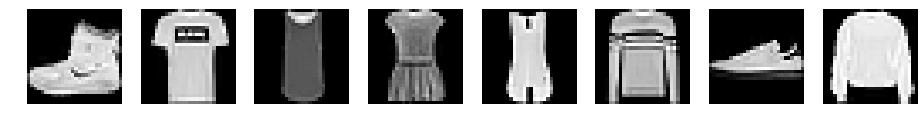

In [0]:
# Mengakses data gambar
plt.figure(figsize=(18, 8))

print('8 data validasi pertama')
for i in range(8):
    plt.subplot(1, 9, i+1)
    img = x_val[i]
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    #plt.title("Class " + str(i))
    plt.axis('off')
    
plt.show()

##Memeriksa data

Berikut akan dilakukan pemeriksaan terhadap dataset apakat terdapat record atau field yang tidak layak dipakai / field yang bernilai NaN.

###Memeriksa data training

In [0]:
np.isnan(x_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [0]:
np.isnan(y_train)

array([False, False, False, ..., False, False, False])

In [0]:
# Untuk mengecek jumlah total nilai NaN di DataFrame:
x_trainNAN = df_train_images.isnull().any().sum()
y_trainNAN = df_train_labels.isnull().any().sum()
print('total nilai NaN di DataFrame training = ', x_trainNAN)
print('total nilai NaN di DataFrame label training = ', y_trainNAN)

total nilai NaN di DataFrame training =  0
total nilai NaN di DataFrame label training =  0


###Memeriksa data testing

In [0]:
np.isnan(x_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [0]:
np.isnan(y_test)

array([False, False, False, ..., False, False, False])

In [0]:
# Untuk mengecek jumlah total nilai NaN di DataFrame:
x_testNAN = df_test_images.isnull().any().sum()
y_testNAN = df_test_labels.isnull().any().sum()
print('total nilai NaN di DataFrame testing = ', x_testNAN)
print('total nilai NaN di DataFrame label testing = ', y_testNAN)

total nilai NaN di DataFrame testing =  0
total nilai NaN di DataFrame label testing =  0


###Memeriksa data validasi

In [0]:
np.isnan(x_val)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [0]:
np.isnan(y_val)

array([False, False, False, ..., False, False, False])

In [0]:
# Untuk mengecek jumlah total nilai NaN di DataFrame:
x_valNAN = df_val_images.isnull().any().sum()
y_valNAN = df_val_labels.isnull().any().sum()
print('total nilai NaN di DataFrame validasi = ', x_valNAN)
print('total nilai NaN di DataFrame label validasi= ', y_valNAN)

total nilai NaN di DataFrame validasi =  0
total nilai NaN di DataFrame label validasi=  0


Berdasarkan output dari hasil pemeriksaan diatas, dapat kita ketahui bahwa semua dataset baik data train, data test, maupun data validasi layak digunakan untuk proses klasifikasi

##Visualisasi data

Pada bagian ini akan ditunjukkan visualisasi perbedaan jumlah data dari setiap klasifikasi

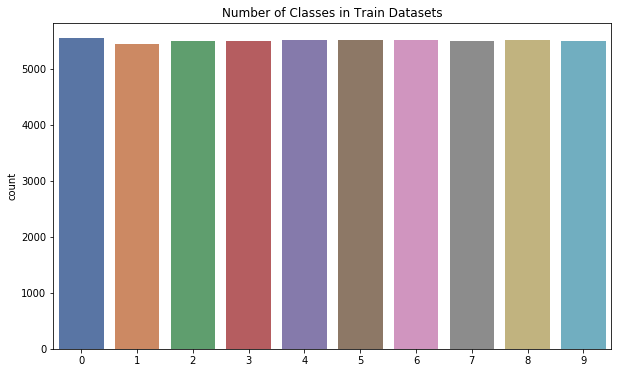

In [0]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y_train, palette="deep")
plt.title("Number of Classes in Train Datasets")
plt.show()

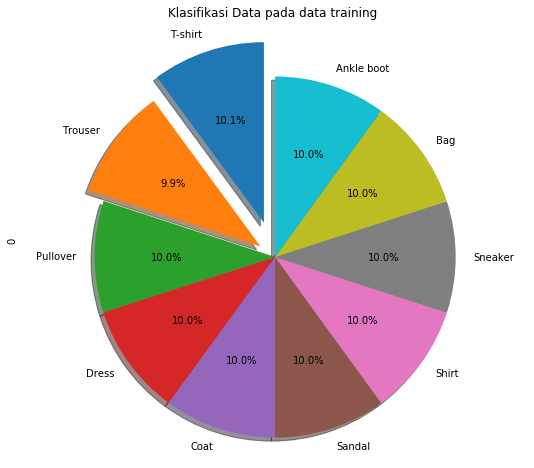

In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
df_train_labels[0].value_counts(sort=False).plot(kind='pie', figsize=(9,8), labels=class_names, explode=(0.2,0.1,0,0,0,0,0,0,0,0), autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Klasifikasi Data pada data training')
plt.axis('equal')
plt.show()

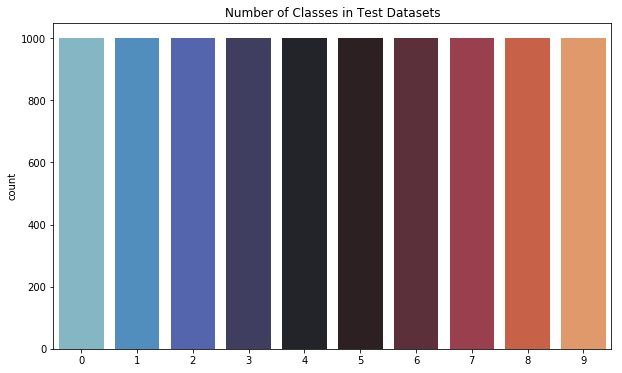

In [0]:
plt.figure(figsize=(10, 6))
sns.countplot(y_test, palette="icefire")
plt.title("Number of Classes in Test Datasets")
plt.show()

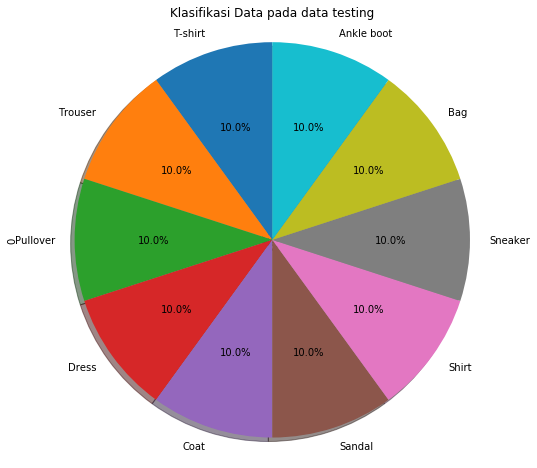

In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
df_test_labels[0].value_counts(sort=False).plot(kind='pie', figsize=(9,8), labels=class_names, explode=(0,0,0,0,0,0,0,0,0,0), autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Klasifikasi Data pada data testing')
plt.axis('equal')
plt.show()

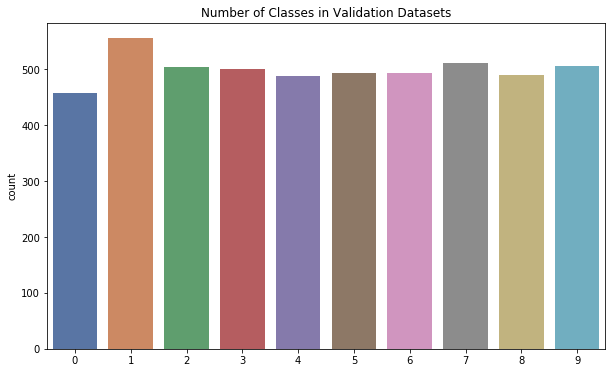

In [0]:
plt.figure(figsize=(10, 6))
sns.countplot(y_val, palette="deep")
plt.title("Number of Classes in Validation Datasets")
plt.show()

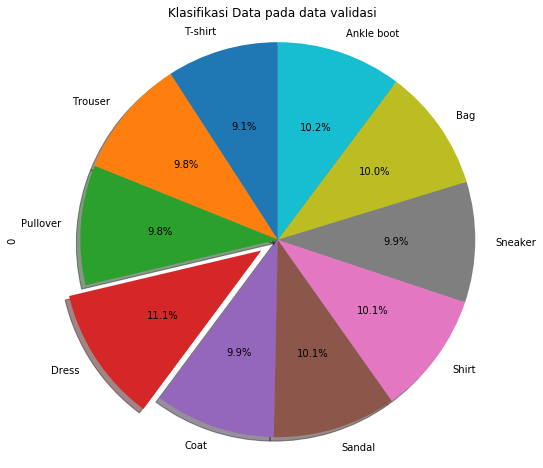

In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
df_val_labels[0].value_counts(sort=False).plot(kind='pie', figsize=(9,8), labels=class_names, explode=(0,0,0,0.1,0,0,0,0,0,0), autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Klasifikasi Data pada data validasi')
plt.axis('equal')
plt.show()

#Proses Traning

##Reshaping and Normalizing data 

Pada proses klasifikasi ini, akan digunakan metode CNN dengan library Keras. Adapun beberapa hal yang perlu dilakukan agar algoritma dapat dijalankan dengan library Keras, antara lain proses reshaping data, menyamakan tipe data, dan proses normalizing data.

In [0]:
# Membentuk kembali array menjadi 4 dimensi sehingga dapat bekerja dengan API Keras
# Konversikan gambar menjadi tensor, dengan ukuran gambar 28 x 28 piksel, 1 channel grayscale
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Memastikan bahwa nilainya adalah bertipe float sehingga kita bisa mendapatkan titik desimal setelah pembagian
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

# Normalisasi kode RGB dengan membaginya dengan nilai RGB maksimal.
x_train /= 255 
x_test /=255
x_val /=255

##Pembentukan Model CNN

Pada project ini kita menggunakan model CNN yang dibentuk menggunakan model Sequential. Selanjutnya dikenai 3 proses konvolusi dan 3 proses pooling. Proses pooling dijalankan untuk mereduksi dimensi dari feture map hasil proses konvolusi sehingga mempercepat komputasi karena parameter yang harus diupdate semakin sedikit dan mengatasi overfitting. Pada project ini digunakan Maxpooling, yaitu pooling dengan menentukan nilai maksimum pada setiap pergeseran layer.

Setelah semua proses konvolusi selesai, dilakukan proses flattening atau proses reshape feature map mejadi sebuah vector agar bisa digunakan sebagai input dari fully-connected layer. Adapun proses Relu dapat diibaratkan seperti thresholding atau sama halnya seperti fungsi aktivasi pada jaringan syaraf tiruan. Sedangkan fungsi Softmax menghitung probabilitas dari setiap kelas target atas semua kelas target yang memungkinkan dan akan membantu untuk menentukan kelas target untuk input yang diberikan.

In [0]:
# Pembentukan Model
model = Sequential()

# Convolusi layer 1
model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', kernel_initializer='he_normal', input_shape=input_shape))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))  #reduksi dimensi
model.add(Dropout(0.25)) # Add dropouts to the model

# Convolusi layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) #reduksi dimensi
model.add(Dropout(0.25)) # Add dropouts to the model

# Convolusi layer 3
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4)) # Add dropouts to the model

#FULLY CONNECTED LAYER
model.add(Flatten()) #konversi menjadi data satu dimensi 
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3)) # Add dropouts to the model

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

model.summary()

W0818 16:57:42.198314 140528583362432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 16:57:42.200832 140528583362432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 16:57:42.212309 140528583362432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0818 16:57:42.243432 140528583362432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 16:57:42.248060 140528583362432 deprec

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

Dapat diperhatikan pada hasil diatas menunjukkan output shape pada setiap proses. 

Selanjutnya akan ditunjukkan diagram alur yang menggambarkan proses dari model CNN sebagai berikut :

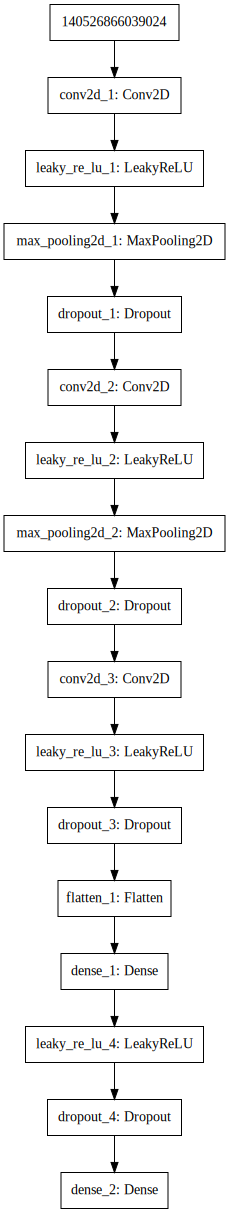

In [0]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

##Fitting Model

Pada bagian ini akan dilakukan proses fitting model.  Proses fitting ini dilakukan terhadap data training dan data validasi. Sebelum melakukan fitting model, terlebih dahulu dilakukan optimisasi model menggunakan Adam optimizer. Proses optimisasi ini berperan untuk meminimalkan fungsi loss.

In [0]:
# Adam Optimizer
adam = Adam(lr=0.001)          # lr = learning rate

# compiling and fitting model
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, verbose=1, batch_size=128)

W0818 16:57:42.773078 140528583362432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 16:57:42.904497 140528583362432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/60
55000/55000 [==============================] - 14s 257us/step - loss: 0.9576 - acc: 0.6408 - val_loss: 0.6198 - val_acc: 0.7756
Epoch 2/60
55000/55000 [==============================] - 8s 141us/step - loss: 0.6267 - acc: 0.7617 - val_loss: 0.5101 - val_acc: 0.8094
Epoch 3/60
55000/55000 [==============================] - 8s 141us/step - loss: 0.5494 - acc: 0.7923 - val_loss: 0.4509 - val_acc: 0.8306
Epoch 4/60
55000/55000 [==============================] - 8s 141us/step - loss: 0.5027 - acc: 0.8089 - val_loss: 0.4279 - val_acc: 0.8408
Epoch 5/60
55000/55000 [==============================] - 8s 142us/step - loss: 0.4723 - acc: 0.8230 - val_loss: 0.3938 - val_acc: 0.8540
Epoch 6/60
55000/55000 [==============================] - 8s 142us/step - loss: 0.4438 - acc: 0.8346 - val_loss: 0.3660 - val_acc: 0.8632
Epoch 7/60
55000/55000 [==============================] - 8s 142us/step - loss: 0.4243 - acc: 0.8415 - val_loss: 0.3446 - 

Output diatas pada baris ke-1 menunjukkan jumlah data training sebanyak 55000 dan data validasi sebanyak 5000. Pada baris ke-2 dan seterusnya menunjukkan hasil training model terhadap data training dan data validasi untuk setiap epoch. Hasil yang diperoleh pad epoch terakhir (epoch ke-60) yaitu, nilai loss training sebesar 0.2322 dan nilai loss validasi sebesar 0.2170. Nilai akurasi pada training sebesar 0.9133 dan nilai akurasi data validasi sebesar 0.9208

##Akurasi Model

Pada bagian ini akan ditunjukkan visualisasi yang menggambarkan perbedaan nilai akurasi model dan nilai loss sebagai akibat dijalankannya model terhadap data training dan data validasi. Visualisasi ini akan membantu dalam memahami performa model yang telah dialankan.

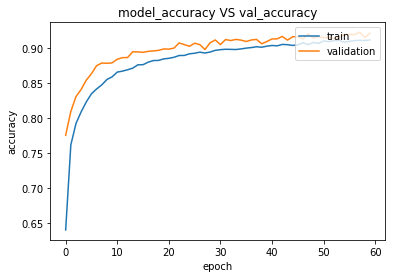

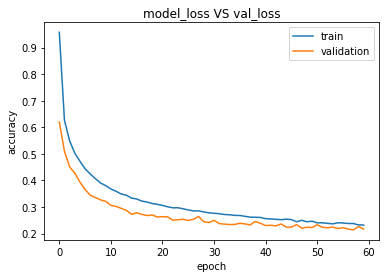

In [0]:
# Plotting akurasi model terhadap data training dan data validasi
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy VS val_accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.savefig('acc_plot.png')
plt.show()

# Plotting fungsi loss terhadap data training dan data validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss VS val_loss')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.savefig('acc_plot.png')
plt.show()

Selanjutkan mari kita perhatikan 2 visualisasi di atas. 

Pertama kita perhatikan visualisasi "model_accuracy VS val_accuracy". Pada visualisasi ini, perubahan nilai pada grafik biru dan orange memiliki pola yang mirip dan perbedaan nilainya tidak terlalu jauh. Hal ini berarti bahwa nilai akurasi yang dihasilkan dari proses validasi mendekati nilai akurasi yang dihasikan pada proses training. Selanjutnya dapat diketahui bahwa kedua grafik tersebut cenderung naik yang berarti bahwa nilai akurasi yang diperoleh, kedunya cenderung naik.

Kedua kita perhatikan visualisasi "model_loss VS val_loss". Pada visualisasi ini, ternyata perubahan nilai pada grafik biru dan orange juga memiliki pola yang mirip dan perbedaan nilainya tidak terlalu jauh. Hal ini berarti bahwa nilai loss yang dihasilkan dari proses validasi mendekati nilai loss yang dihasikan pada proses training. Selanjutnya dapat diketahui bahwa kedua grafik tersebut cenderung menurun yang berarti bahwa nilai loss yang diperoleh, kedunya cenderung menurun.

#Evaluasi Model

Pada bagian ini akan dilakukan evaluasi model dengan malakukan prediksi terhadap data testing serta akan ditunjukkan classification report dan Confusion Matriks.

In [0]:
# Evaluate the model on test set

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2479706649541855
Test accuracy: 0.9113


##Pengetesan model

Berikut ini akan dilakukan pengetesan model dengan memprediksi klasifikasi dari data testing. Selanjutnya akan dihitung nilai akurasi dari prediksi tersebut berdasarkan klasifikasi hasil prediksi dan klasifikasi sebenarnya.

In [0]:
# Testing
from sklearn.metrics import accuracy_score
total_test = len(x_test)
correct_prediction = 0

y_true = []
y_pred = []

for i in range (len(x_test)):
  predict = model.predict(x_test[i].reshape(1,28,28,1))
  print (predict)
  
  label = y_test[i]
  prediction = predict.argmax(axis=-1)
  #print ('Original label:' + str(label))
  #print ('Original prediction:' + str(prediction)+"\n")
  
  y_true.append(label)
  y_pred.append(prediction)
  
  if prediction[0] == label:
    correct_prediction +=1
print("\n"+'total correct prediction =' +str(correct_prediction)+"\n")
print('total incorrect prediction =' +str(total_test - correct_prediction)+"\n")
print('accuracy =', accuracy_score(y_true, y_pred))

[[4.2934575e-12 3.1391631e-14 1.5864302e-13 3.5827245e-15 2.1321587e-13
  1.0668603e-05 2.2244899e-13 4.1097642e-06 3.5000429e-12 9.9998522e-01]]
[[1.4145886e-06 2.2700165e-13 9.9999428e-01 6.2438388e-10 2.6829277e-06
  1.8110018e-14 1.6554976e-06 2.5551495e-18 7.6535037e-12 8.8140512e-16]]
[[3.2298766e-14 1.0000000e+00 1.7837725e-17 3.0905595e-13 2.6831801e-16
  9.6489932e-22 7.6805268e-16 2.5855318e-24 3.9432017e-17 1.2846522e-23]]
[[1.7477582e-12 1.0000000e+00 4.2701489e-15 3.7468851e-11 4.8040144e-12
  1.2416675e-19 9.5253287e-14 6.6991562e-22 8.5610828e-18 1.1085104e-20]]
[[1.8470713e-01 2.0739728e-06 1.5235085e-02 2.1184201e-03 4.5017111e-03
  2.1188420e-07 7.9343432e-01 3.7119338e-07 5.1176784e-07 1.8957780e-07]]
[[4.0396378e-10 1.0000000e+00 1.7321877e-11 3.1559774e-10 5.9619036e-13
  6.6699830e-15 4.1931122e-11 2.2820021e-17 4.6511114e-10 4.3052451e-17]]
[[2.9683346e-07 4.9274762e-10 1.8859368e-03 2.1255822e-08 9.9083418e-01
  1.1860402e-12 7.2796834e-03 2.6888071e-16 4.864273

Berdasarkan hasil prediksi di atas, diperoleh total data yang diklasifikasikan benar sebanyak 9113 dari total 10000 data. Sedangkan total data yang diklasifikasikan salah sebanyak 887 dari total 10000 data. Akurasi dari proses prediksi tersebut sebesar 0.9113 atau 91%.

##Classification report

Pada bagian ini akan ditunjukkan nilai precision, recall, dan akurasi f1-score pada setiap klasifikasi yang diperoleh dari proses pengetesan model. Adapun niai precision menunjukkan tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang diberikan oleh sistem. Adapun nilai recall menunjukkan tingkat keberhasilan sistem dam menemukan kembali sebuah informasi.

In [0]:
from sklearn.metrics import classification_report

print('classification report: \n', classification_report(y_true, y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.83      0.89      0.86      1000
           3       0.91      0.94      0.92      1000
           4       0.87      0.83      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.72      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Berdasarkan output di atas, diperoleh nilai precision dan recall dari masing-masing kelas cukup tinggi. Namun, terdapat nilai precision dan recall yang masih rendah yaitu pada kelas ke-6. Akurasi yang diperoh dari proses testing adalah 91 %

## Confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

#Membuat fungsi untuk visualisasi
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   # if normalize:
   #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   #     print("Normalized confusion matrix")
   # else:
   #     print('Confusion matrix, without normalization')

   # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Class: T-shirt
Number of Wrong Prediction: 127 out of 10000
Class: Trouser
Number of Wrong Prediction: 19 out of 10000
Class: Pullover
Number of Wrong Prediction: 108 out of 10000
Class: Dress
Number of Wrong Prediction: 65 out of 10000
Class: Coat
Number of Wrong Prediction: 172 out of 10000
Class: Sandal
Number of Wrong Prediction: 32 out of 10000
Class: Shirt
Number of Wrong Prediction: 284 out of 10000
Class: Sneaker
Number of Wrong Prediction: 21 out of 10000
Class: Bag
Number of Wrong Prediction: 20 out of 10000
Class: Ankle boot
Number of Wrong Prediction: 39 out of 10000


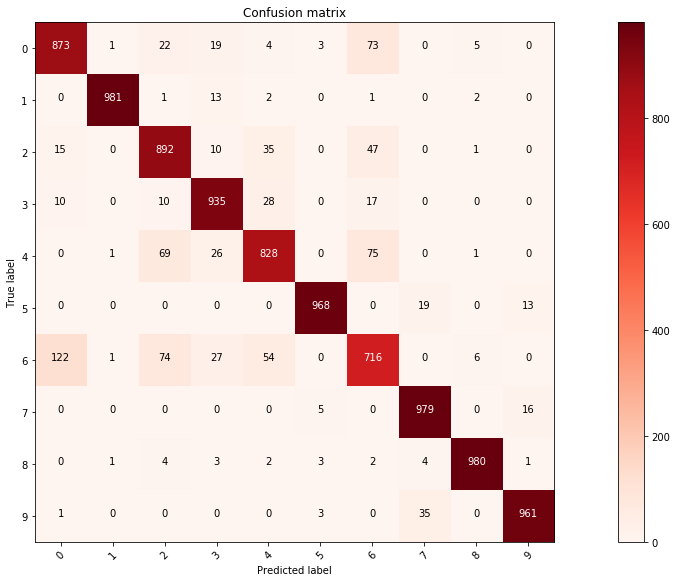

In [0]:
plt.figure(figsize=(18,8))
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=['0','1','2','3','4','5','6','7','8','9'],normalize= False,  title='Confusion matrix')

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)
for i in range(len(confusion_mtx)):
    print("Class:",str(class_names[i]))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 10000")

#Kesimpulan

Berdasarkan proses klasifikasi yang tela dijalankan, diperoleh beberapa poin-poin penting sebagai berikut :


*   pada proses training diperoleh nilai loss sebesar 0.2322 dan nilai akurasi sebesar 0.9133 atau 91%
*   pada proses validasi diperoleh nilai loss sebesar 0.2170 dan nilai akurasi sebesar 0.9208 atau 92%
*   grafik perubahan nilai loss dan nilai akurasi pada proses training mirip dengan grafik perubahan nilai loss dan nilai akurasi pada proses validasi
*   pada proses testing diperoleh nilai loss sebesar 0.2479 dan nilai akurasi sebesar 0.9113 atau 91%
*   total data yang diklasifikasikan salah dalam proses pengetesan model sebesar 887 dari 10000 data
*  total data yang diklasifikasikan benar dalam proses pengetesan model sebesar 9113 dari 10000 data.

Selanjutnya dapat dilihat dari poin-poin penting diatas, secara garis besar nilai loss dan nilai akurasi yang diperoleh dari proses training, validasi, dan testing tidak jauh berbeda. Nilai akurasi yang diperoleh juga cukup tinggi yaitu 91%. Hal ini berarti bahwa model CNN yang dijalankan dalam proses klasifikasi data MNIST fashion cukup baik. Namun model ini bukanlah model terbaik, perlu dilakukan eksperimen lanjut mengenai nilai-nilai parameter yang terkait dalam pemodelan untuk mencari nilai akurasi yang lebih baik.









<h1 align=center><font size = 5> .....TERIMAKASIH.....</font></h1>